# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

In [3]:
print(X)
print(Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [4]:
Y = Y.reshape(len(Y), 1)
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

## Training the SVR model on the whole dataset

In [15]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, Y)

C:\Users\gaura\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [16]:
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))


array([170370.0204065])

## Visualising the SVR results

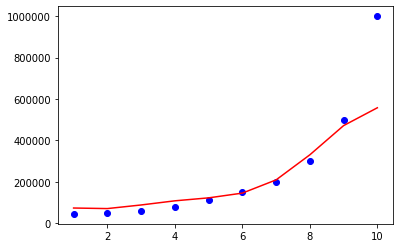

In [17]:

plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color='blue')
plt.plot(sc_X.inverse_transform(X), sc_Y.inverse_transform(regressor.predict(X)), color='red')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

In [18]:
print(sc_X.inverse_transform(X))

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]


[0.01158103 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103
 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103
 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103
 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103
 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103
 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103
 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103
 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103
 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103
 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103
 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103
 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103
 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103
 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103
 0.01158103 0.01158103 0.01158103 0.01158103 0.01158103 0.0115

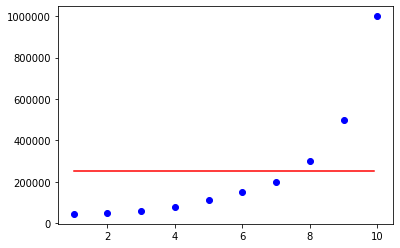

In [19]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color = 'blue')
plt.plot(X_grid, sc_Y.inverse_transform(regressor.predict(sc_X.inverse_transform(X_grid))), color = 'red')
print(regressor.predict(sc_X.inverse_transform(X_grid)))
plt.show()